# Linear Regression

In [1]:
# Load dataset
import pandas as pd
cdata = pd.read_stata("https://stats.idre.ucla.edu/stat/data/crime.dta")
cdata.head()

,sid,state,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,1.0,ak,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,2.0,al,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,3.0,ar,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,4.0,az,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,5.0,ca,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


In [2]:
# Model fit
import statsmodels.formula.api as smf
formula = "crime~poverty+single+murder+pctmetro+pctwhite+pcths"
ols = smf.ols(formula,data=cdata).fit()

## Coefficients

In [3]:
from scientistmetrics import coefficients
coefficients(ols)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1143.7912,584.999,-1.955,0.057,-2322.780,35.197
poverty,15.0068,9.722,1.544,0.130,-4.587,34.601
single,54.8519,21.304,2.575,0.013,11.917,97.787
murder,19.3315,4.444,4.350,0.000,10.375,28.288
pctmetro,6.6218,1.119,5.920,0.000,4.368,8.876
pctwhite,-0.6983,2.505,-0.279,0.782,-5.747,4.350
pcths,4.7913,6.678,0.717,0.477,-8.668,18.250


## Metrics with ols model
### R2

In [4]:
# R - squared
from scientistmetrics import r2_score
r2_score(ols,adjust=False)

0.8950092460587786

### Adjusted R2

In [5]:
# Adjusted r-squared
r2_score(ols,adjust=True)

0.8806923250667938

### Mean Squared Error (MSE)

In [6]:
from scientistmetrics import mean_squared_error
mean_squared_error(ols,squared=True)

20027.448984038703

### Root Mean Squared Error (RMSE)

In [7]:
# Root mean squared error
mean_squared_error(ols,squared=False)

141.51836977593652

### Median Absolute Error

In [8]:
# Median Absolute Error
from scientistmetrics import median_absolute_error
median_absolute_error(ols)

96.79076994319689

### Max Error

In [9]:
# Max Error
from scientistmetrics import max_error
max_error(ols)

415.1971734188437

### Explained Variance Score

In [10]:
# Explained Variance Score
from scientistmetrics import explained_variance_score
explained_variance_score(ols)

0.8950092460587787

### Mean absolute error

In [11]:
from scientistmetrics import mean_absolute_error
mean_absolute_error(ols)

116.40764521951125

### Mean Absolute Percentage error

In [12]:
mean_absolute_error(ols,percentage=True)

0.26251524299598006

### Others metrics

#### AIC

In [13]:
from scientistmetrics import extractAIC
extractAIC(ols)

663.8795424871918

#### AICC

In [14]:
from scientistmetrics import extractAICC
extractAICC(ols)

666.4841936499824

#### BIC

In [15]:
from scientistmetrics import extractBIC
extractBIC(ols)

677.402321916262

### Likelihood Ratio test

#### Full model versus null model

In [16]:
from scientistmetrics import LikelihoodRatioTest
LikelihoodRatioTest(ols)

LikelihoodRatioTestResult(statistic=114.94803251063342, df_denom=6.0, pvalue=1.8722969832734026e-22)

#### Full model versus nested model

In [17]:
ols2 = smf.ols("crime ~ poverty + single", data = cdata).fit()
LikelihoodRatioTest(ols,ols2)

LikelihoodRatioTestResult(statistic=52.30837024703442, df_denom=4.0, pvalue=1.189100321839507e-10)

### Autocorrelation test

In [18]:
from scientistmetrics import check_autocorrelation

#### Durbin - Watson

In [19]:

check_autocorrelation(ols,test ="dw")

1.701742281001304

#### Breusch - Godfrey

In [20]:
check_autocorrelation(ols,test="bg")

{'lm': 7.4384358473101155,
 'lm-pvalue': 0.6835062097907081,
 'fvalue': 0.5805733189976061,
 'f-pvalue': 0.8181297581135918}

#### Newey - West HAC Covariance Matrix Covariance

In [21]:
check_autocorrelation(ols,test="nw")

{'cov':                Intercept      poverty       single      murder    pctmetro  \
 Intercept  198774.310435 -3190.180937  1006.603611  206.754883 -265.088231   
 poverty     -3190.180937   111.311772   -52.177664  -18.068109    2.920557   
 single       1006.603611   -52.177664   596.211933  -96.955787  -15.758682   
 murder        206.754883   -18.068109   -96.955787   26.615979    2.504526   
 pctmetro     -265.088231     2.920557   -15.758682    2.504526    1.492383   
 pctwhite     -395.106568    -8.148921   -18.359849   10.273992    1.722107   
 pcths       -1547.985653    37.800854   -45.405230   -1.820693    1.787481   
 
              pctwhite        pcths  
 Intercept -395.106568 -1547.985653  
 poverty     -8.148921    37.800854  
 single     -18.359849   -45.405230  
 murder      10.273992    -1.820693  
 pctmetro     1.722107     1.787481  
 pctwhite     8.951494    -3.022580  
 pcths       -3.022580    22.067493  ,
 'coef_model_HAC':                  Coef.    Std.Err. 

#### Feasible GLS - Cochrane Orcutt Procedure

In [22]:
check_autocorrelation(ols,test="corc")

{'coef':              Coef.    Std.Err.         t         P>|t|       [0.025  \
 const -1385.748015  566.071326 -2.448010  1.852125e-02 -2527.339640   
 x1       21.908777    9.289153  2.358533  2.296275e-02     3.175416   
 x2       38.291443   21.705456  1.764139  8.481201e-02    -5.481781   
 x3       21.325807    4.435029  4.808493  1.890524e-05    12.381719   
 x4        7.295659    1.177287  6.197011  1.889722e-07     4.921434   
 x5        0.702856    2.406261  0.292095  7.716188e-01    -4.149831   
 x6        6.674360    6.111002  1.092188  2.808324e-01    -5.649650   
 
            0.975]  
 const -244.156391  
 x1      40.642139  
 x2      82.064666  
 x3      30.269896  
 x4       9.669884  
 x5       5.555543  
 x6      18.998370  ,
 'rho': 0.20736213969244727}

#### Ljung - Box / Box - Pierce

In [23]:
check_autocorrelation(ols,test="lb-bp",nlags=1)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,0.965349,0.325843,0.910707,0.339927


### Heteroscedasticite

In [24]:
from scientistmetrics import check_heteroscedasticity

#### Breusch - Pagan

In [25]:
check_heteroscedasticity(ols,test="bp")

{'lm': 8.12179308378289,
 'lm-pvalue': 0.2293155764013604,
 'fvalue': 1.3890463298551534,
 'f-pvalue': 0.2403680345817599}

#### White test

In [26]:
check_heteroscedasticity(ols,test="white")

{'lm': 34.00168131588642,
 'lm-pvalue': 0.1659985203372701,
 'fvalue': 1.7039564755356738,
 'f-pvalue': 0.09895473322676572}

#### Goldfeld - Quandt

In [27]:
check_heteroscedasticity(ols,test="gq")

{'fvalue': 0.42699115063628096,
 'f-pvalue': 0.9615032668242602,
 'alternative': 'increasing'}

### Normality

In [28]:
from scientistmetrics import check_normality

#### Shapiro test

In [29]:
check_normality(ols,test="shapiro")

NormalityTest(statistic=0.9858171939849854, pvalue=0.7970981597900391)

#### Jarque - Bera test

In [30]:
check_normality(ols,test="jarque-bera")

NormalityTest(statistic=0.31587592270123727, pvalue=0.8539027552989096)

#### Agostino - Pearson test

In [31]:
check_normality(ols,test="agostino")

NormalityTest(statistic=0.7214697252181284, pvalue=0.6971638181602863)

#### Kolmogorov-Smirnov Test

In [32]:
check_normality(ols,test="kstest")

NormalityTest(statistic=0.08506644874021024, pvalue=0.8238027415824155)

### Residuals

In [33]:
from scientistmetrics import residuals

#### Model residuals

In [34]:
residuals(ols,choice="response")

0     170.659449
1      92.108287
2      96.790770
3     -78.344617
4      59.725367
5     -95.062294
6    -154.587557
7      91.249431
8     415.197173
9      -7.813687
10   -137.746751
11    170.731457
12    139.055036
13    183.756730
14    -60.754966
15     88.840521
16     25.064119
17   -177.416359
18    158.234154
19    150.463725
20    -48.309932
21    -55.402855
22   -100.101126
23     84.675536
24   -327.342033
25    -34.558728
26     57.487180
27    -13.082196
28     76.080459
29   -128.821303
30      4.931544
31    231.240088
32    111.973209
33    106.251462
34   -128.549951
35     11.124275
36    -27.695420
37   -151.830337
38   -190.189560
39    270.826840
40     35.068417
41     92.162657
42    -74.221005
43   -178.957489
44   -174.856876
45    -62.451432
46   -153.773873
47   -200.039132
48   -156.124451
49     44.697066
50    -50.361022
dtype: float64

#### Pearson residuals

In [35]:
residuals(ols,choice="pearson")

array([ 1.12010509,  0.60454292,  0.6352759 , -0.51420654,  0.39200107,
       -0.62393123, -1.01461895,  0.59890591,  2.72510237, -0.0512843 ,
       -0.90408611,  1.12057771,  0.9126729 ,  1.2060677 , -0.39875874,
        0.58309528,  0.16450567, -1.16445336,  1.03855299,  0.98755262,
       -0.31707709, -0.36363073, -0.65700307,  0.55575885, -2.14847452,
       -0.22682253,  0.37731097, -0.0858636 ,  0.49934598, -0.84550489,
        0.03236767,  1.51771966,  0.73492422,  0.69737014, -0.8437239 ,
        0.07301299, -0.18177593, -0.99652223, -1.24828889,  1.77754309,
        0.23016782,  0.60489977, -0.48714165, -1.1745684 , -1.14765446,
       -0.40989331, -1.00927842, -1.31293551, -1.02470618,  0.29336443,
       -0.3305392 ])

#### Standardized residuals

In [36]:
from scientistmetrics import rstandard
rstandard(ols,choice="sd_1")

0     1.354346
1     0.635342
2     0.675436
3    -0.535250
4     0.418557
5    -0.659503
6    -1.068856
7     0.621676
8     2.919516
9    -0.055726
10   -1.642545
11    1.172933
12    0.963488
13    1.226225
14   -0.409174
15    0.608015
16    0.178270
17   -1.332229
18    1.084646
19    1.042890
20   -0.336371
21   -0.377618
22   -0.679544
23    0.568139
24   -2.625368
25   -0.243959
26    0.395558
27   -0.091023
28    0.519389
29   -0.876505
30    0.034195
31    1.644099
32    0.777585
33    0.718504
34   -0.863815
35    0.077804
36   -0.186785
37   -1.035457
38   -1.373735
39    1.872424
40    0.241817
41    0.630608
42   -0.501059
43   -1.242952
44   -1.212011
45   -0.447490
46   -1.066451
47   -1.332830
48   -1.149936
49    0.313348
50   -1.428568
dtype: float64

#### Leave - one out CV residuals

In [37]:
rstandard(ols,choice="predictive")

0     249.500998
1     101.732547
2     109.415196
3     -84.888333
4      68.091733
5    -106.210684
6    -171.556427
7      98.319799
8     476.552175
9      -9.225827
10   -454.669876
11    187.058002
12    154.970490
13    189.950311
14    -63.970027
15     96.596435
16     29.433793
17   -232.224174
18    172.591420
19    167.798500
20    -54.368085
21    -59.747047
22   -107.087711
23     88.489983
24   -488.789246
25    -39.977957
26     63.181818
27    -14.701575
28     82.310439
29   -138.440717
30      5.503955
31    271.353719
32    125.350206
33    112.789065
34   -134.745077
35     12.632037
36    -29.242915
37   -163.926465
38   -230.336206
39    300.510671
40     38.707833
41    100.162990
42    -78.522378
43   -200.401876
44   -195.017623
45    -74.433244
46   -171.688951
47   -206.147397
48   -196.616447
49     50.993784
50   -940.698066
dtype: float64

### Overall performance

In [38]:
from scientistmetrics import model_performance
model_performance(ols,metrics="all")

AIC                             663.879542
AICC                            666.484194
BIC                             677.402322
r2 score                          0.895009
r2 score adj.                     0.880692
expl. var. score                  0.895009
mean abs. error                 116.407645
median abs. error                96.790770
mean sq. error                20027.448984
root mean sq. error             141.518370
mean abs. percentage error        0.262515
Name: statistics, dtype: float64

### Model check

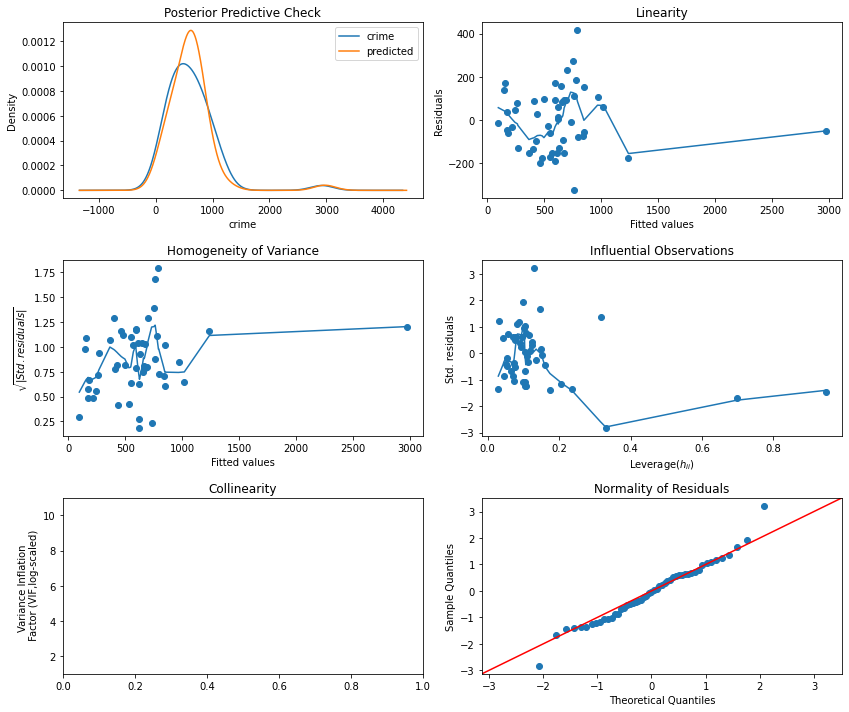

In [39]:
from scientistmetrics import check_model
check_model(ols)

## Test

In [40]:
#test de normalité de Jarque-Bera
pred = ols.predict(cdata)
pred.head(6)

0     590.340551
1     687.891713
2     496.209230
3     793.344617
4    1018.274633
5     662.062294
dtype: float64

### y-pred and y-true

In [41]:
y_true = cdata["crime"]
y_pred = pred

### Metrics

#### R2

In [42]:
r2_score(y_true=y_true,y_pred=y_pred)

0.8950092460587787

#### Mean Squared Error (MSE)

In [43]:
mean_squared_error(y_true=y_true,y_pred=y_pred)

20027.448984038703

#### Root Mean Squared Error (RMSE)

In [44]:
mean_squared_error(y_true=y_true,y_pred=y_pred,squared=False)

141.51836977593652

#### Median Absolute Error

In [45]:
median_absolute_error(y_true=y_true,y_pred=y_pred)

96.79076994319689

#### Max Error

In [46]:
max_error(y_true=y_true,y_pred=y_pred)

415.1971734188437

#### Explained variance score

In [47]:
explained_variance_score(y_true=y_true,y_pred=y_pred)

0.8950092460587787

#### Mean Absolute Error

In [48]:
mean_absolute_error(y_true=y_true,y_pred=y_pred)

116.40764521951125

#### Mean Absolute Percentage Error (MAPE)

In [49]:
mean_absolute_error(y_true=y_true,y_pred=y_pred,percentage=True)

0.26251524299598006

## Power set

In [50]:
# Powerset model
D = cdata.drop(["sid","state"],axis="columns")
D.head()

,crime,murder,pctmetro,pctwhite,pcths,poverty,single
0,761,9.0,41.799999,75.199997,86.599998,9.100000,14.3
1,780,11.6,67.400002,73.500000,66.900002,17.400000,11.5
2,593,10.2,44.700001,82.900002,66.300003,20.000000,10.7
3,715,8.6,84.699997,88.599998,78.699997,15.400000,12.1
4,1078,13.1,96.699997,79.300003,76.199997,18.200001,12.5


In [51]:
# Powerset model
from scientistmetrics import powersetmodel
ols_res = powersetmodel(DTrain=D,target="crime",split_data=False,model_type="linear")
# All metrics
ols_metrics = ols_res[1]
ols_metrics

,predictor,count,aic,bic,rsquared,adj. rsquared,expl. var. score,max error,mean abs. error,mean sq. error,median abs. error,r2 score,mean abs. percentage error,likelihood test ratio
0,murder,1,690.352940,694.216591,0.785344,0.780963,0.785344,586.863507,161.371705,40946.586017,132.535344,0.785344,0.471231,36.473397
1,pctmetro,1,750.929328,754.792979,0.295978,0.281610,0.295978,1952.755114,236.831837,134295.252241,165.623628,0.295978,0.534550,97.049785
2,pctwhite,1,737.537251,741.400902,0.458567,0.447517,0.458567,1325.462675,199.074242,103280.749315,130.338886,0.458567,0.519812,83.657708
3,pcths,1,765.369230,769.232881,0.065563,0.046492,0.065563,2246.070207,276.167106,178248.044015,250.123618,0.065563,0.775603,111.489688
4,poverty,1,753.498887,757.362539,0.259598,0.244488,0.259598,1713.931234,256.737941,141234.873248,178.824440,0.259598,0.693566,99.619345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,pctwhite+poverty+single+pctmetro+murder,5,662.472719,674.063673,0.893781,0.881979,0.893781,432.925169,116.020051,20261.746450,85.330373,0.893781,0.265207,0.593177
59,poverty+single+pcths+pctmetro+murder,5,661.969552,673.560506,0.894824,0.883138,0.894824,417.052534,116.823116,20062.826649,99.024292,0.894824,0.264064,0.090010
60,pctwhite+poverty+single+pcths+murder,5,691.759317,703.350270,0.811377,0.790419,0.811377,639.993966,139.532876,35980.664747,103.203991,0.811377,0.393967,29.879774
61,pctwhite+poverty+single+pcths+pctmetro,5,680.121517,691.712471,0.849862,0.833179,0.849862,533.262377,133.387053,28639.576804,108.470517,0.849862,0.300104,18.241975
